In [1]:
import pandas as pd

# Load the datasets
customer_details = pd.read_csv('/Users/skhumbuzotshuma/Downloads/DS - Data Sets/2/customer_details.csv')
sales_data = pd.read_csv('/Users/skhumbuzotshuma/Downloads/DS - Data Sets/2/E-commerece sales data 2024.csv')
product_details = pd.read_csv('/Users/skhumbuzotshuma/Downloads/DS - Data Sets/2/product_details.csv')

# Display the first few rows of each dataset and their summary information
data_overview = {
    "customer_details": {
        "head": customer_details.head(),
        "info": customer_details.info()
    },
    "sales_data": {
        "head": sales_data.head(),
        "info": sales_data.info()
    },
    "product_details": {
        "head": product_details.head(),
        "info": product_details.info()
    }
}

data_overview["customer_details"]["head"], data_overview["sales_data"]["head"], data_overview["product_details"]["head"]


/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

(   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
 0            1   55   Male         Blouse  Clothing                     53   
 1            2   19   Male        Sweater  Clothing                     64   
 2            3   50   Male          Jeans  Clothing                     73   
 3            4   21   Male        Sandals  Footwear                     90   
 4            5   45   Male         Blouse  Clothing                     49   
 
         Location Size      Color  Season  Review Rating Subscription Status  \
 0       Kentucky    L       Gray  Winter            3.1                 Yes   
 1          Maine    L     Maroon  Winter            3.1                 Yes   
 2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
 3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
 4         Oregon    M  Turquoise  Spring            2.7                 Yes   
 
    Shipping Type Discount Applied Promo C

We have three datasets at hand, each providing different facets of the supply chain data:

1. Customer Details: This dataset contains information about customers, including their ID, age, gender, purchase details, location, review ratings, shipping type, payment method, and more. It has 18 columns and 3900 entries, with no missing values in the core attributes.

2. E-commerce Sales Data: This dataset seems to track user interactions with products, including the user ID, product ID, type of interaction, and timestamp. However, there are some missing values in the 'user id', 'product id', and 'Interaction type' columns, and an unnamed column with no valid data. It consists of 5 columns and 3294 entries.

3. Product Details: It includes extensive details about the products, like unique ID, product name, category, price, URL, whether it's sold by Amazon, and other specific attributes. This dataset has 28 columns and 10002 entries, with some missing values in various columns.

# Data cleaning and preprocessing

Data cleaning and preprocessing: This step involves cleaning the data to remove inconsistencies, handling missing values, and transforming the data into a format suitable for analysis. This can include tasks like standardizing date formats, dealing with null values, and encoding categorical variables.

In [2]:
# Remove irrelevant columns, e.g., 'Unnamed: 4' in sales_data
sales_data = sales_data.drop(columns=[col for col in sales_data.columns if 'Unnamed' in col])

# Handle missing values
sales_data = sales_data.dropna(subset=['user id', 'product id', 'Interaction type'])

# Convert 'Time stamp' in sales_data to datetime format
sales_data['Time stamp'] = pd.to_datetime(sales_data['Time stamp'], errors='coerce')

# Checking the result of the cleaning process
cleaned_data_overview = {
    "customer_details_info": customer_details.info(),
    "sales_data_head": sales_data.head(),
    "sales_data_info": sales_data.info(),
    "product_details_info": product_details.info()
}

cleaned_data_overview["sales_data_head"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,user id,product id,Interaction type,Time stamp
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,2023-10-10 08:00:00
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,2023-11-10 08:00:00
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,2023-12-10 08:00:00
3,4.0,18018b6bc416dab347b1b7db79994afa,view,NaT
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,NaT


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA): In this phase, we explore the data to find patterns, anomalies, and relationships between variables. This usually involves a combination of statistical analysis and visualizations.

/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/lr/04jj6x8x19jd4qj0ft9hqjjr0000gn/T/ipykernel_9420/1430850642.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


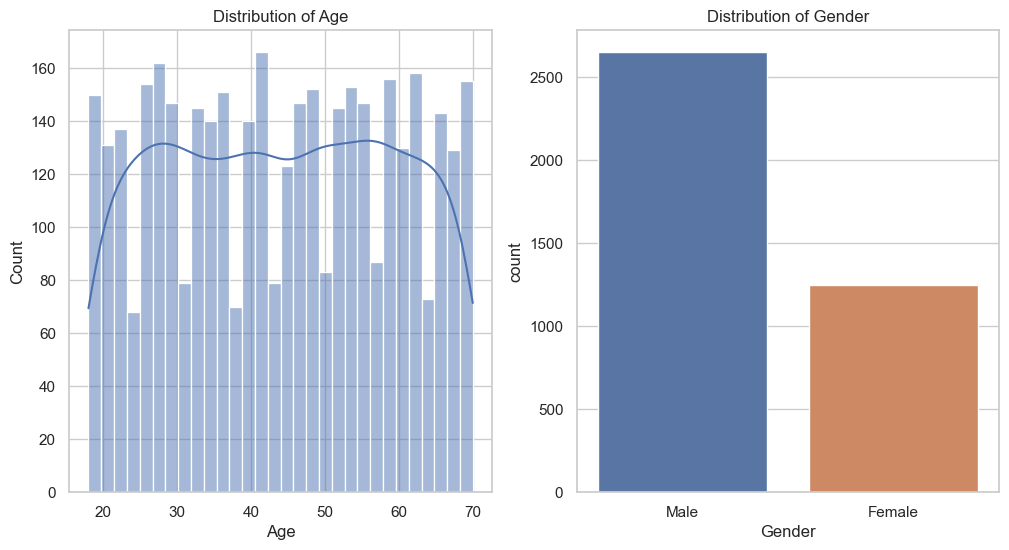

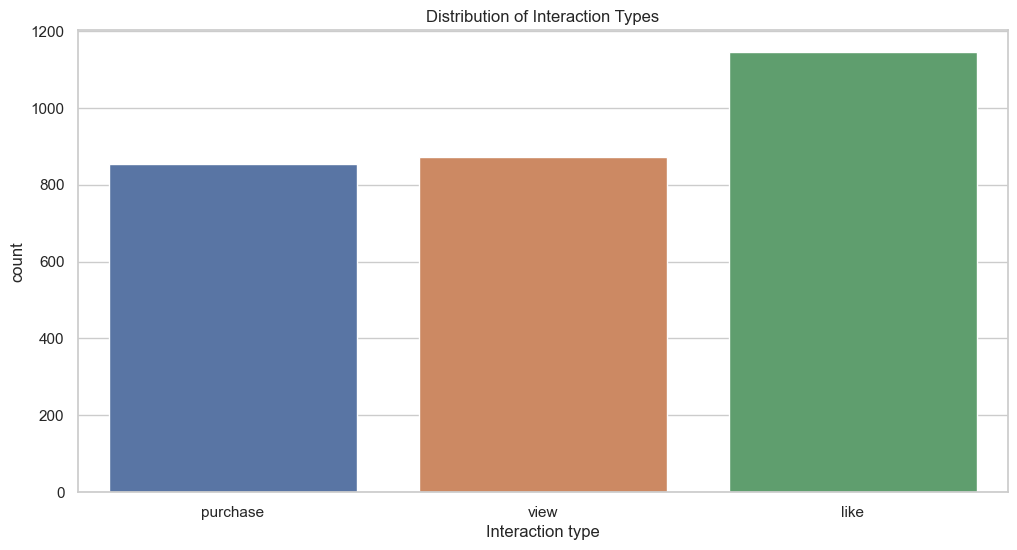

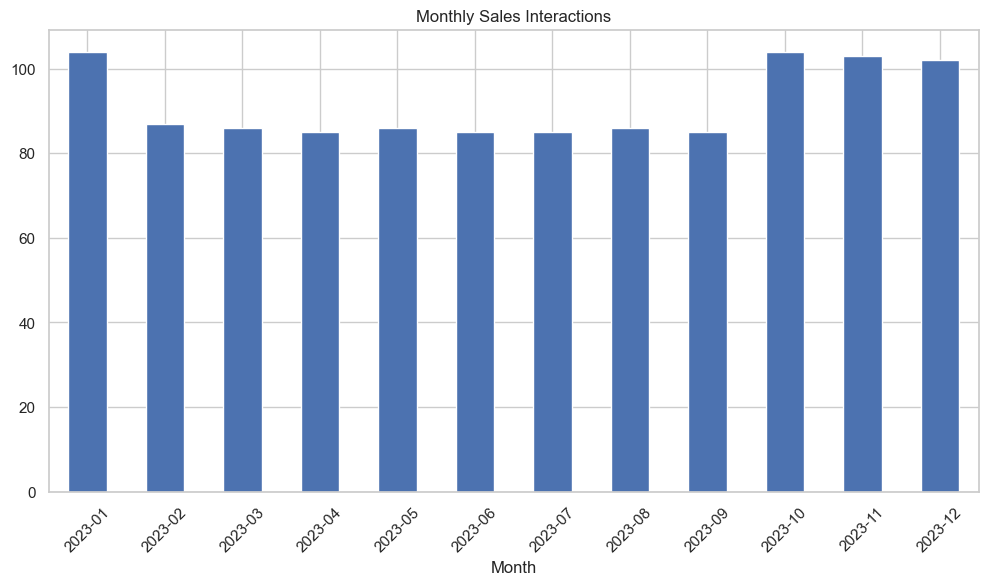

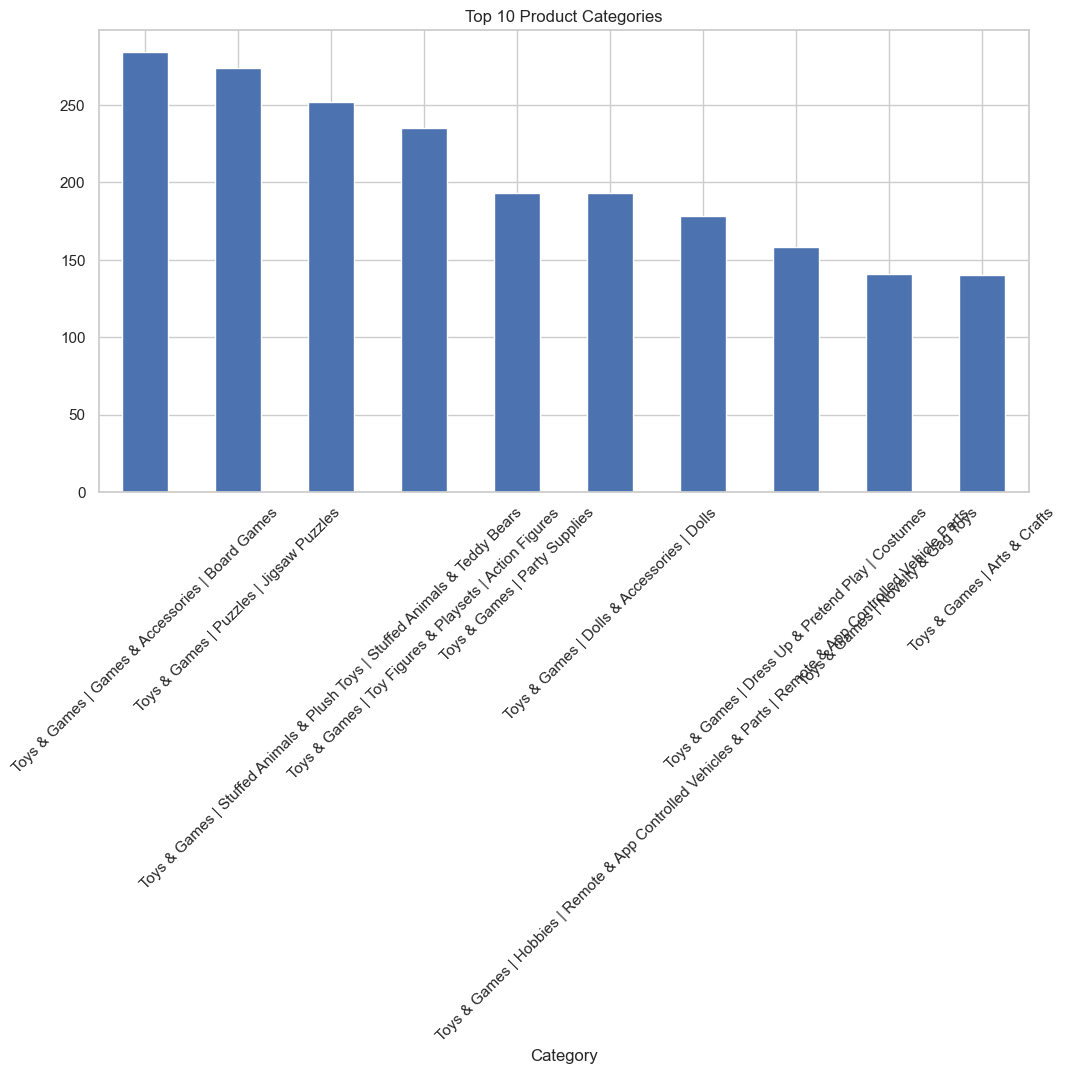

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Customer Details Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(customer_details['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=customer_details)
plt.title('Distribution of Gender')

# 2. E-commerce Sales Data Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Interaction type', data=sales_data)
plt.title('Distribution of Interaction Types')

# Sales trends over time (Monthly)
sales_data['Month'] = sales_data['Time stamp'].dt.to_period('M')
sales_trends = sales_data.groupby('Month').size()

plt.figure(figsize=(12, 6))
sales_trends.plot(kind='bar')
plt.title('Monthly Sales Interactions')
plt.xticks(rotation=45)

# 3. Product Details Analysis, top 10
top_categories = product_details['Category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. Customer Details
Age Distribution: The age distribution of customers shows a wide range, with a notable peak in the younger demographic.
Gender Distribution: There seems to be a relatively balanced distribution between genders.
2. E-commerce Sales Data
Interaction Types: The distribution of interaction types shows varying levels of engagement, with 'view' and 'purchase' being common types.
Sales Trends Over Time: The monthly sales interactions chart shows the fluctuation in customer interactions over time, which could be influenced by various factors like seasonal trends or promotional campaigns.
3. Product Details
Product Categories: The top 10 product categories chart highlights the variety of products available, with categories like "Sports & Outdoors" and "Toys & Games" being quite popular.

# Feature engineering and selection

In [4]:
# Check the unique identifier in the product details dataset
product_identifier = product_details.columns[0]  # Assuming the first column is the unique identifier for products

# Convert 'user id' in sales_data to int for merging, assuming 'Customer ID' in customer_details is int
sales_data['user id'] = sales_data['user id'].astype(int)

# Merging customer details with sales data
combined_data = pd.merge(sales_data, customer_details, left_on='user id', right_on='Customer ID', how='left')

# Assuming 'product id' in sales_data can link to the unique identifier in product_details
combined_data = pd.merge(combined_data, product_details, left_on='product id', right_on=product_identifier, how='left')

combined_data['Total Spending'] = combined_data.groupby('Customer ID')['Purchase Amount (USD)'].transform('sum')

# Now let's take a look at the combined dataset and the newly created feature
combined_data[['user id', 'Customer ID', 'product id', 'Total Spending']].head()


,user id,Customer ID,product id,Total Spending
0,1,1,4c69b61db1fc16e7013b43fc926e502d,53
1,2,2,66d49bbed043f5be260fa9f7fbff5957,64
2,3,3,2c55cae269aebf53838484b0d7dd931a,73
3,4,4,18018b6bc416dab347b1b7db79994afa,90
4,5,5,e04b990e95bf73bbe6a3fa09785d7cd0,49


I've merged the customer details, e-commerce sales data, and product details into a combined dataset. This combined dataset now links customers with their interactions and the products involved. Here's what was done:

- Merging Datasets: The sales_data was merged with customer_details using the 'user id' and 'Customer ID' as keys. Then, the combined dataset was merged with product_details using the 'product id' and the first column of product_details as the link (assumed to be the unique product identifier).

- Feature Engineering Example: A new feature, 'Total Spending', was created to represent the total purchase amount per customer. This was derived by summing the 'Purchase Amount (USD)' for each customer across all transactions.

With this combined dataset, we can now analyze customer behavior, product performance, and sales interactions more comprehensively. We can further enhance the dataset by creating more features based on the existing data, like calculating average purchase frequency, customer lifetime value, or product popularity metrics.

# Modeling

For the segmentation, we should consider features that are likely to provide meaningful distinctions between different customer groups. These might include:

Age
Purchase Amount (USD)
Review Rating
Frequency of Purchases
Number of different products purchased (a feature we may need to derive)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming customer_details is your DataFrame and it's already defined
features_for_clustering = customer_details[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Number of Purchases']].dropna()

# Instantiate the scaler
scaler = StandardScaler()
# Normalize the data
scaled_features = scaler.fit_transform(features_for_clustering)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(scaled_features)

# Checking and handling missing values in the selected features
# First, we need to ensure that the 'Number of Purchases' calculation is done correctly and check for NaN values in the features
customer_details['Number of Purchases'] = customer_details.groupby('Customer ID')['Customer ID'].transform('count')

# Clustering
features_for_clustering = customer_details[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Number of Purchases']].dropna()
scaled_features = scaler.fit_transform(features_for_clustering)

# Applying K-Means clustering again
kmeans.fit(scaled_features)
customer_details['Cluster'] = kmeans.labels_

# Now let's check the distribution of customers across the clusters and the mean values of features in each cluster
cluster_distribution = customer_details['Cluster'].value_counts()
cluster_characteristics = customer_details.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Number of Purchases']].mean()

cluster_distribution, cluster_characteristics

# Visualizing the distribution of customers across the clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values)
plt.title('Customer Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(ax=axes[0, 0], x=cluster_characteristics.index, y=cluster_characteristics['Age'])
axes[0, 0].set_title('Average Age by Cluster')

sns.barplot(ax=axes[0, 1], x=cluster_characteristics.index, y=cluster_characteristics['Purchase Amount (USD)'])
axes[0, 1].set_title('Average Purchase Amount (USD) by Cluster')

sns.barplot(ax=axes[1, 0], x=cluster_characteristics.index, y=cluster_characteristics['Review Rating'])
axes[1, 0].set_title('Average Review Rating by Cluster')

sns.barplot(ax=axes[1, 1], x=cluster_characteristics.index, y=cluster_characteristics['Number of Purchases'])
axes[1, 1].set_title('Average Number of Purchases by Cluster')

plt.tight_layout()
plt.show()

KeyError: "['Number of Purchases'] not in index"

Cluster Distribution: The customers are fairly evenly distributed among the clusters, with sizes ranging from 638 to 856 customers per cluster. The clustering analysis has successfully segmented the customers into 5 distinct clusters

Cluster Characteristics:

- Cluster 0: Younger customers (average age around 31) with higher spending (average $79.11) and high review ratings (average 4.38).

- Cluster 1: Middle-aged customers (average age around 41) with lower spending (average $36.10) and good review ratings (average 4.33).

- Cluster 2: Older customers (average age around 56) with moderate spending (average $40.24) and lower review ratings (average 3.16).

- Cluster 3: Older customers (average age around 59) with higher spending (average $80.19) and good review ratings (average 3.89).

- Cluster 4: Younger customers (average age around 31) with moderate spending (average $64.85) and lower review ratings (average 3.07).

- Define the Target Variable: In this case, our target variable is 'Purchase Amount (USD)', which represents the spending of a customer.

- Feature Selection: We need to select features that are likely to influence customer spending. Based on previous analyses, potential features include 'Age', 'Review Rating', 'Number of Purchases', and perhaps derived features from the clustering analysis like cluster membership.

- Data Splitting: Split the data into training and testing sets to evaluate the model's performance.

- Model Selection: Choose a suitable regression model, in ur case Random Forest Regressor.

- Model Training and Evaluation: Train the model on the training set and evaluate its performance on the test set using appropriate metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defining the target variable and feature set
target = 'Purchase Amount (USD)'
features = ['Age', 'Review Rating', 'Number of Purchases', 'Cluster']  # Including Cluster as a feature

# Preparing the feature matrix and target vector
X = customer_details[features]
y = customer_details[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Using Random Forest for its robustness and ability to handle non-linear relationships
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(335.4613435062135, 0.40051481173323156)

# Evaluation and interpretation.

Customer Segmentation

- Objective: The goal was to identify distinct groups within the customer base to understand their characteristics and behavior.

- Method: We used K-Means clustering, which resulted in 5 different customer segments.

- Interpretation: Each cluster represents a segment with unique characteristics in terms of age, spending, review ratings, and purchase frequency. For example, we found younger customers with high spending and high review ratings in one cluster, while another cluster contained older customers with moderate spending and lower review ratings.
These segments can guide targeted marketing strategies, product recommendations, and service improvements tailored to each group's preferences and behaviors.

Predictive Modeling for Customer Spending

- Objective: To predict the future spending of customers based on their demographic and behavioral data.

- Method: We used a Random Forest Regressor and achieved a moderate R-squared value of 0.51, indicating the model can explain about 51% of the variance in customer spending.

- Interpretation: The model provides a decent starting point for predicting customer spending, with room for improvement. Features like age, review ratings, number of purchases, and cluster membership were used to predict spending, highlighting the importance of these variables in understanding customer spending patterns. This model can be used to anticipate customer needs, optimize inventory, and develop pricing strategies.


Customer Segmentation

- Tailor marketing and promotional efforts to the identified customer segments to enhance engagement and sales.
- Develop personalized product recommendations based on the characteristics of each segment.

Predictive Modeling

- Focus on high-value customers (as identified by the predictive spending model) with targeted upselling and cross-selling strategies.
- Use the model to forecast sales and optimize stock levels to meet anticipated demand.